<a href="https://colab.research.google.com/github/mabelc/Signals-denoising/blob/main/filters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Filtering signals

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import signal
from pywt import wavedec
from pywt import waverec
from pywt import threshold
from pywt import dwt_max_level
from scipy.fft import fft, fftfreq

## Hampel filter

In [2]:

def hampel_filter_forloop(input_series, window_size, n_sigmas=3):
    
    n = len(input_series)
    new_series = input_series.copy()
    k = 1.4826 # scale factor for Gaussian distribution
    
    indices = []
    
    # possibly use np.nanmedian 
    for i in range((window_size),(n - window_size)):
        x0 = np.median(input_series[(i - window_size):(i + window_size)])
        S0 = k * np.median(np.abs(input_series[(i - window_size):(i + window_size)] - x0))
        if (np.abs(input_series[i] - x0) > n_sigmas * S0):
            new_series[i] = x0
            indices.append(i)
    
    return pd.Series(new_series), indices

Outlier Indices:  [6, 10]


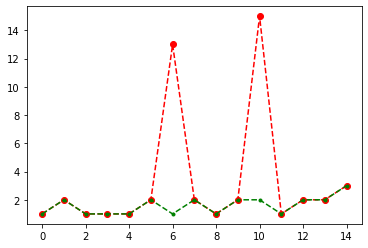

In [ ]:
ts = pd.Series([1, 2, 1 , 1 , 1, 2, 13, 2, 1, 2, 15, 1, 2, 2, 3])

filtered, indices = hampel_filter_forloop(ts, 3, 3)

print("Outlier Indices: ", indices)

ts.plot(style="o--", color=[1,0,0])
filtered.plot(style="g.--")
plt.show()

## Buttterworth filter

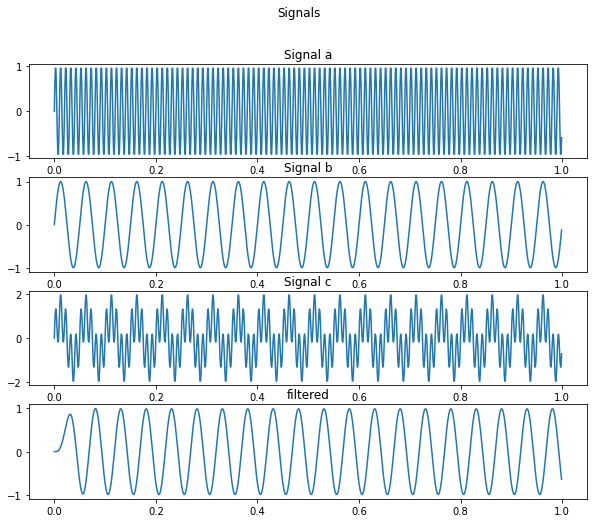

In [57]:
fs = 1000  # Sampling frequency

# Generate the time vector
t = np.arange(1000) / fs
signal_a = np.sin(2*np.pi*100*t) # with frequency of 100
signal_b = np.sin(2*np.pi*20*t) # frequency 20
signal_c = signal_a + signal_b

fc = 30  # Cut-off frequency of the filter
sos = signal.butter(N=5, Wn=fc, btype='low', fs=fs, output='sos')
output = signal.sosfilt(sos, signal_c)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(10,8))
fig.suptitle('Signals')
ax1.plot(t, signal_a)
ax1.set_title('Signal a')
ax2.plot(t, signal_b)
ax2.set_title('Signal b')
ax3.plot(t, signal_c)
ax3.set_title('Signal c')
ax4.plot(t, output)
ax4.set_title('filtered');

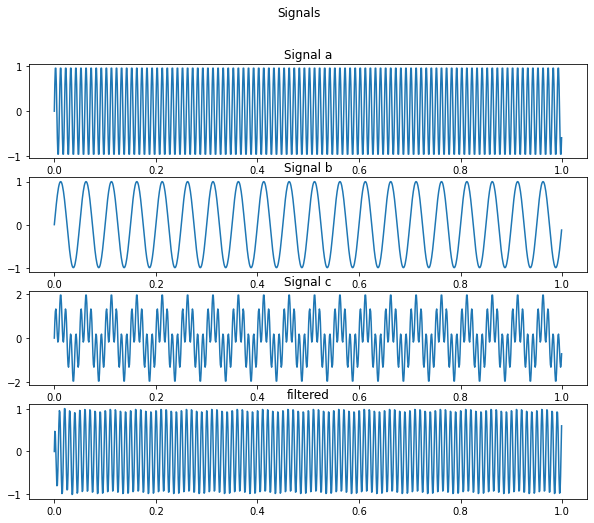

In [ ]:
fs = 1000  # Sampling frequency

# Generate the time vector
t = np.arange(1000) / fs
signal_a = np.sin(2*np.pi*100*t) # with frequency of 100
signal_b = np.sin(2*np.pi*20*t) # frequency 20
signal_c = signal_a + signal_b

fc = 40  # Cut-off frequency of the filter
sos = signal.butter(N=5, Wn=fc, btype='highpass', fs=fs, output='sos')
output = signal.sosfilt(sos, signal_c)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(10,8))
fig.suptitle('Signals')
ax1.plot(t, signal_a)
ax1.set_title('Signal a')
ax2.plot(t, signal_b)
ax2.set_title('Signal b')
ax3.plot(t, signal_c)
ax3.set_title('Signal c')
ax4.plot(t, output)
ax4.set_title('filtered');

In [4]:
signal_o = [67.42403132, 50.80354318, 69.46221995, 25.07987241, 22.8035085 ,
       50.60632372, 71.11258679, 43.829214  , 68.0661443 , 26.2488095 ,
       21.9317122 , 56.56854249, 22.20360331, 44.18144407, 17.4642492 ,
       45.35416188, 66.94027188, 50.80354318, 71.38627319, 54.34151268,
       22.02271555, 79.20858539, 77.1038261 , 55.47071299, 62.16912417,
       66.49060084, 54.08326913, 79.39773297, 50.24937811, 75.58438992,
       27.20294102, 72.20110802, 19.41648784, 23.85372088, 19.6977156 ,
       54.40588203, 65.        , 26.62705391, 70.09279564, 49.64876635,
       75.        , 51.623638  , 51.2249939 , 51.73973328, 52.34500931,
       52.03844733, 49.64876635, 24.41311123, 60.21627687, 72.00694411,
       22.56102835, 51.85556865, 63.0634601 , 50.69516742, 50.        ,
       50.15974482, 50.6359556 , 20.39607805, 50.6359556 , 51.86520992,
       51.00980298, 23.76972865, 25.96150997, 19.92485885, 70.9365914 ,
       49.73932046, 66.61080993, 48.91829923, 47.38143096, 57.30619513,
       41.18252056, 24.41311123, 71.61005516, 51.00980298, 46.84015371,
       49.49747468, 61.09828148, 51.00980298, 21.02379604, 24.51530134,
       61.52235366, 25.07987241, 58.30951895, 28.01785145, 60.53924347,
       48.46648326, 46.81879964, 48.54894438, 70.76722405, 50.59644256,
       59.66573556, 25.96150997, 60.08327554, 25.23885893, 24.04163056,
       67.89698079, 69.52697318, 51.10772936, 69.8140387 , 71.28113355,
       70.0285656 , 48.37354649, 45.27692569, 48.70318265, 63.82005954,
       66.61080993, 70.77428912, 47.42362281, 63.1585307 , 44.01136217,
       54.23098745, 22.02271555, 50.6359556 , 70.34912935, 37.36308338,
       66.28725368, 24.41311123, 46.69047012, 63.        , 51.54609588,
       60.8276253 , 46.86149806, 44.38468204, 55.36244214, 58.89821729,
       70.76722405, 51.6139516 , 60.20797289, 46.87216658, 62.96824597,
       47.51841748, 39.44616585, 52.32590181, 64.62971453, 60.8358447 ,
       25.61249695, 30.41381265, 59.43904441, 52.80151513, 42.72001873,
       26.92582404, 63.95310782, 67.47592163, 41.77319715, 52.88667129,
       68.59300256, 52.0096145 , 70.34202158, 52.63078947, 21.47091055,
       58.03447251, 53.71219601, 63.2455532 , 68.87670143, 72.06941099,
       65.73431372, 53.53503526, 73.00684899, 53.93514624, 36.05551275,
       44.94441011, 24.33105012, 29.12043956, 60.8276253 , 32.20248438,
       39.96248241, 53.60037313, 21.37755833, 32.75667871, 65.76473219,
       30.08321791, 66.85057965, 65.76473219, 34.20526275, 21.9317122 ,
       69.85699679, 39.96248241, 58.83026432, 59.09314681, 45.01110974,
       24.20743687, 68.9637586 , 65.49045732, 34.17601498, 62.76941931,
       45.65084884, 40.31128874, 50.009999  , 39.44616585, 69.23149572,
       39.59797975, 42.42640687, 74.14849965, 47.75981575, 78.02563681,
       44.77722635, 38.47076812, 49.47726751, 62.03224968, 46.04345773]

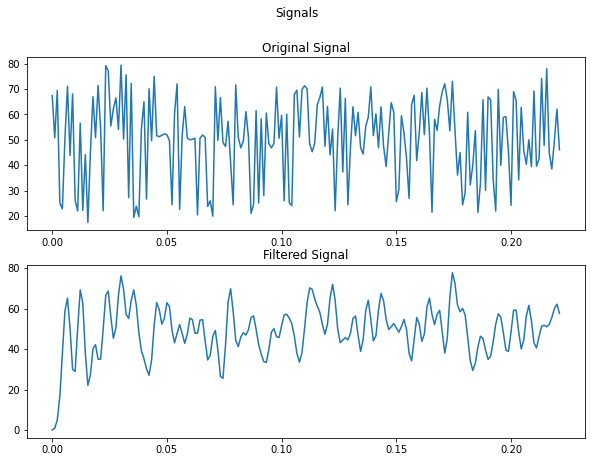

In [ ]:
fs = 900  # Sampling frequency

# Generate the time vector
t = np.arange(200) / fs

fc = 200  # Cut-off frequency of the filter
sos = signal.butter(N=10, Wn=fc, btype='lowpass', fs=fs, output='sos')
output = signal.sosfilt(sos, signal_o)

fig, (ax1, ax2) = plt.subplots(2, figsize=(10,7))
fig.suptitle('Signals')
ax1.plot(t, signal_o)
ax1.set_title('Original Signal')
ax2.plot(t, output)
ax2.set_title('Filtered Signal');

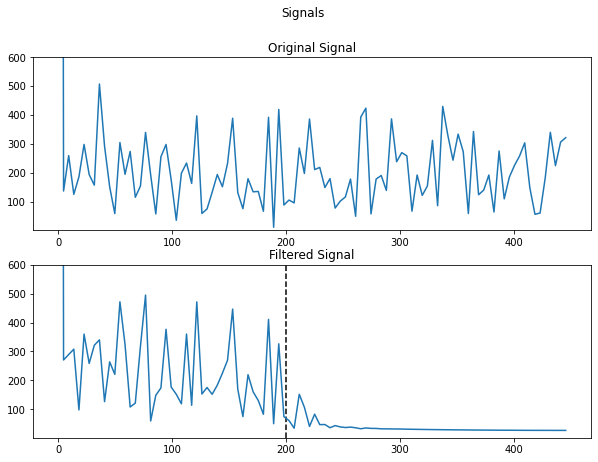

In [ ]:
N = len(signal_o)

xf = fftfreq(len(yf), 1/fs)
yf = fft(signal_o)
yf_o = fft(output)

fig, (ax1, ax2) = plt.subplots(2, figsize=(10,7))
fig.suptitle('Signals')
ax1.plot(xf[0:N//2], np.abs(yf[0:N//2]))
ax1.set_ylim([1,600]);
ax1.set_title('Original Signal')
ax2.plot(xf[0:N//2], np.abs(yf_o[0:N//2]))
ax2.set_ylim([1,600]);
ax2.vlines(x=200, ymin=0, ymax=600, linestyles='--')
ax2.set_title('Filtered Signal');

## Discrete Wavelet Transform

### Example 1

In [5]:
# select wavelet type
wavelet = 'sym4'

# find the maximun level
max_lev = dwt_max_level(len(signal_o), wavelet)
f'The maximum level is {max_lev}'

'The maximum level is 4'

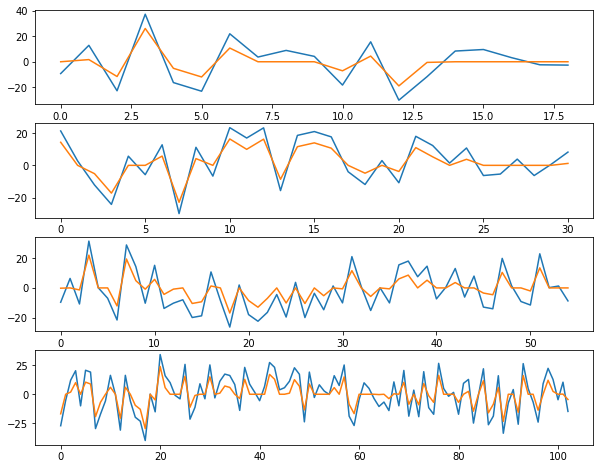

In [6]:
# threshold for filtering
thresh = 0.3

# decompose into wavelet components
coeffs = wavedec(signal_o, wavelet, level=max_lev)

# filter every level
plt.figure(figsize=(10,8))
for i in range(1, len(coeffs)):
    plt.subplot(max_lev, 1, i)
    plt.plot(coeffs[i])
    coeffs[i] = threshold(coeffs[i], thresh*max(coeffs[i]))
    plt.plot(coeffs[i])

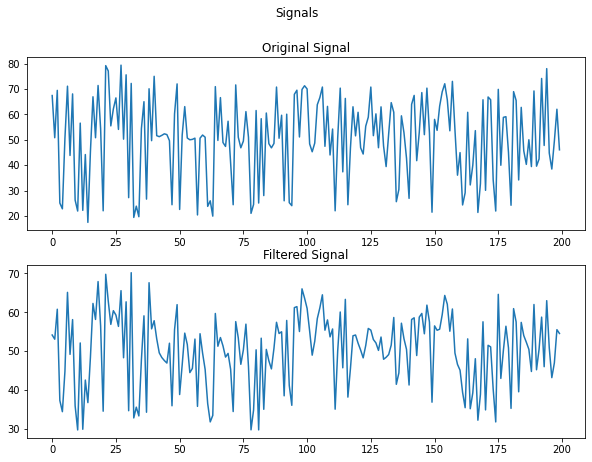

In [10]:
# compose the signal back
output = waverec(coeffs, wavelet)
t = list(range(len(signal_o)))
fig, (ax1, ax2) = plt.subplots(2, figsize=(10,7))
fig.suptitle('Signals')
ax1.plot(t, signal_o)
ax1.set_title('Original Signal')
ax2.plot(t, output)
ax2.set_title('Filtered Signal');

### Example 2

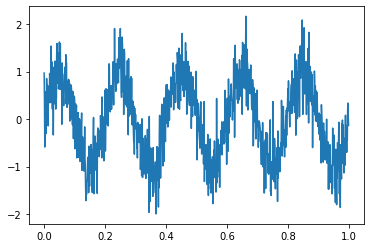

In [15]:
fs = 1000  # Sampling frequency

# Generate the time vector
t = np.arange(1000) / fs
signal =  np.sin(2*np.pi*5*t) + np.random.normal(0, 0.4, 1000)

plt.plot(t, signal);

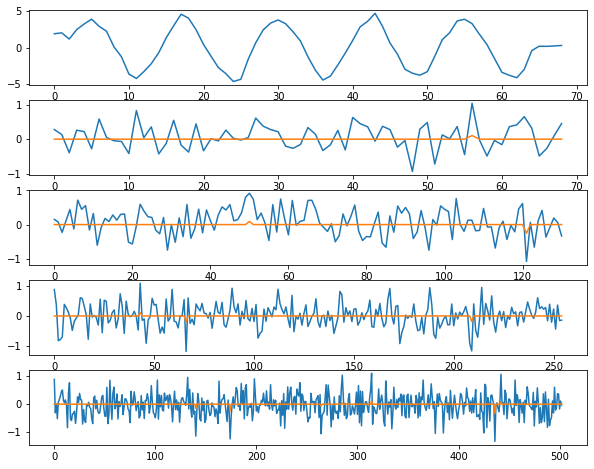

In [16]:
# decompose into wavelet components
coeffs = wavedec(signal, wavelet, level=4)

# select the threshold
thresh = 0.9

# filter every level
plt.figure(figsize=(10,8))
for i in range(0, len(coeffs)):
    plt.subplot(len(coeffs), 1, i+1)
    plt.plot(coeffs[i])
    if i > 0:
      coeffs[i] = threshold(coeffs[i], thresh*max(coeffs[i]))
      plt.plot(coeffs[i])

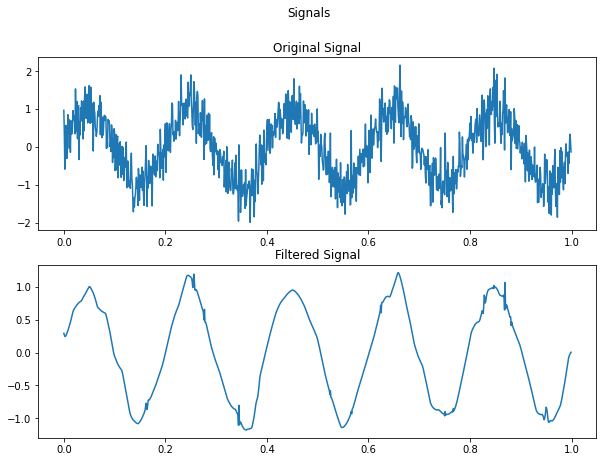

In [17]:
# compose the signal back
output = waverec(coeffs, wavelet)

fig, (ax1, ax2) = plt.subplots(2, figsize=(10,7))
fig.suptitle('Signals')
ax1.plot(t, signal)
ax1.set_title('Original Signal')
ax2.plot(t, output)
ax2.set_title('Filtered Signal');